In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r"C:\Users\Veman S Chippa\OneDrive\Desktop\scraped_wikipedia_population.csv")
df.head()


,Location,Population,% of\nworld,Date,Source (official or from\nthe United Nations),Notes
0,World,"8,232,000,000",100%,13 Jun 2025,UN projection[1][3],NaN
1,India,"1,417,492,000",17.3%,1 Jul 2025,Official projection[4],[b]
2,China,"1,408,280,000",17.1%,31 Dec 2024,Official estimate[5],[c]
3,United States,"340,110,988",4.1%,1 Jul 2024,Official estimate[6],[d]
4,Indonesia,"284,438,782",3.5%,30 Jun 2025,National annual projection[7],NaN


In [6]:
df = df.drop_duplicates()


In [7]:
df.columns = df.columns.str.strip()


In [8]:
df['Population'] = (df['Population']
                    .str.replace(',', '')
                    .astype(int))


In [9]:
df = df.fillna("Not Available")


In [10]:
world_total = df['Population'].sum()

df['World_%'] = (df['Population'] / world_total * 100).round(4)


In [11]:
df_sorted = df.sort_values(by="Population", ascending=False)


In [16]:
from pathlib import Path

# Use raw string for Windows path
output_path = Path(r"C:\Users\Veman S Chippa\OneDrive\Desktop\Output\cleaned_population_data.csv")

# Save DataFrame to CSV
df_sorted.to_csv(output_path, index=False)


In [17]:
output_path

WindowsPath('C:/Users/Veman S Chippa/OneDrive/Desktop/Output/cleaned_population_data.csv')

In [19]:
plt.style.use('seaborn-v0_8')

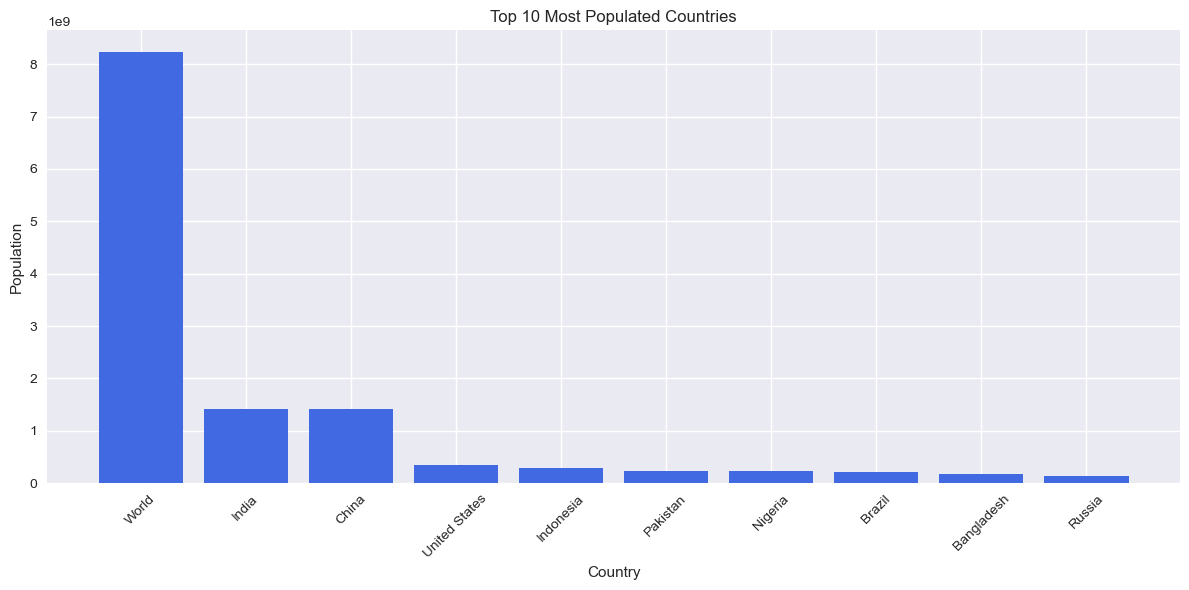

In [21]:
top10 = df.head(10)

plt.figure(figsize=(12,6))
plt.bar(top10["Location"], top10["Population"], color='royalblue')

plt.title("Top 10 Most Populated Countries")
plt.xlabel("Country")
plt.ylabel("Population")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [26]:
plt.figure(figsize=(12,6))
plt.bar(top10["Location"], top10["Population"], color='mediumseagreen')
plt.title("Top 10 Most Populated Countries")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("population_bar_chart.png")
plt.close()
